<a href="https://colab.research.google.com/github/wmezadev/CSE-450-TEAM-4/blob/module-4%2Foptimize/BikeNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Welcome Bikes Neural Netwrok Model

lets instantiate the data and include librarys

In [16]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [17]:

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv', parse_dates=['dteday'])

bikes.tail()

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
16632,2012-11-30,4,19,0,1,1,0.66,0,7.04,7.0010,18,359
16633,2012-11-30,4,20,0,1,1,0.66,0,7.04,7.0010,12,233
16634,2012-11-30,4,21,0,1,1,0.75,6,6.10,5.0012,14,169
16635,2012-11-30,4,22,0,1,1,0.75,0,6.10,5.9978,18,145
16636,2012-11-30,4,23,0,1,2,0.75,6,6.10,5.0012,11,99


handling null values/objects that cannot be scaled

In [18]:
#you could just drop this column of date, but i believe its relevant.
#were gonna split it into one column with the day of year instead.
bikes['day'] = bikes['dteday'].dt.day

bikes['month'] = bikes['dteday'].dt.month
bikes['year'] = bikes['dteday'].dt.year
bikes['day_of_week'] = bikes['dteday'].dt.day_of_week


# #we dont need dteday anymore since its data has been split.
bikes = bikes.drop('dteday', axis=1)

#creating a column for total users (will be the target value)
# bikes['totalUsers'] = bikes['casual'] + bikes['registered']


bikes.head(150)
bikes

,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered,day,month,year,day_of_week
0,1,0,0,0,1,0.81,0,3.28,3.0014,3,13,1,1,2011,5
1,1,1,0,0,1,0.80,0,2.34,1.9982,8,32,1,1,2011,5
2,1,2,0,0,1,0.80,0,2.34,1.9982,5,27,1,1,2011,5
3,1,3,0,0,1,0.75,0,3.28,3.0014,3,10,1,1,2011,5
4,1,4,0,0,1,0.75,0,3.28,3.0014,0,1,1,1,2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,4,19,0,1,1,0.66,0,7.04,7.0010,18,359,30,11,2012,4
16633,4,20,0,1,1,0.66,0,7.04,7.0010,12,233,30,11,2012,4
16634,4,21,0,1,1,0.75,6,6.10,5.0012,14,169,30,11,2012,4
16635,4,22,0,1,1,0.75,0,6.10,5.9978,18,145,30,11,2012,4


for fun, lets looks at the minimum and maximum values to know what to expect.

In [19]:
bikes.max()


season             4.0
hr                23.0
holiday            1.0
workingday         1.0
weathersit         4.0
hum                1.0
windspeed         57.0
temp_c            39.0
feels_like_c      50.0
casual           367.0
registered       886.0
day               31.0
month             12.0
year            2012.0
day_of_week        6.0
dtype: float64

In [20]:
bikes.min()

season             1.00
hr                 0.00
holiday            0.00
workingday         0.00
weathersit         1.00
hum                0.00
windspeed          0.00
temp_c            -7.06
feels_like_c     -16.00
casual             0.00
registered         0.00
day                1.00
month              1.00
year            2011.00
day_of_week        0.00
dtype: float64

Defining Features and Target values

In [21]:
features = bikes[['season', 'hr', 'holiday', 'workingday', 'weathersit', 'hum', 'windspeed', 'temp_c', 'feels_like_c', 'day', 'month', 'year', 'day_of_week']]  
#our target value is actually the TOTAL number of people that came by, thats the casual + registered users
target = bikes['casual'] + bikes['registered']


X = features
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Using a scaler on the values (they're all integers or floats so this is relatively simple)

In [22]:
from math import remainder
scalable_features = ['weathersit', 'hum', 'windspeed', 'temp_c', 'feels_like_c']
categorical_features = ['season', 'hr', 'holiday', 'workingday', 'weathersit', 'day', 'month', 'year', 'day_of_week']

preprocessor = ColumnTransformer(
    transformers=[
        ('scalable', MinMaxScaler(), scalable_features),
        ('categorical', OneHotEncoder(sparse_output=False), categorical_features)],
    remainder='passthrough'    
        )
  


# Fit and transform the training features
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform the testing features
X_test_transformed = preprocessor.transform(X_test)

print(X_train.shape)





(13309, 13)


Time to build the actual model

In [23]:
#we need the number of features for this.



model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train_transformed.shape[1],)),
    Dense(100, activation='relu'),
    Dense(90, activation='relu'),
    Dense(60, activation='relu'),
    Dense(40, activation='relu'),
    Dense(20, activation='relu'),
    Dense(1, activation=None)
])


#compiling the model, using mean squared error since it works great for neural networks
#and the adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')


Lets train the model now!

In [24]:
# Train the model
model_fit = model.fit(X_train_transformed, y_train, epochs=200, batch_size=32, validation_data=(X_test_transformed, y_test))


Epoch 1/200
416/416 [==============================] - 6s 11ms/step - loss: 17106.4492 - val_loss: 4610.9932
Epoch 2/200
416/416 [==============================] - 3s 7ms/step - loss: 2946.8997 - val_loss: 2367.6409
Epoch 3/200
416/416 [==============================] - 1s 3ms/step - loss: 2203.1326 - val_loss: 2153.9919
Epoch 4/200
416/416 [==============================] - 1s 3ms/step - loss: 1925.3347 - val_loss: 1974.5115
Epoch 5/200
416/416 [==============================] - 1s 3ms/step - loss: 1659.5580 - val_loss: 1851.8931
Epoch 6/200
416/416 [==============================] - 1s 3ms/step - loss: 1589.3342 - val_loss: 1814.9159
Epoch 7/200
416/416 [==============================] - 1s 3ms/step - loss: 1417.3652 - val_loss: 2098.2678
Epoch 8/200
416/416 [==============================] - 1s 3ms/step - loss: 1305.9032 - val_loss: 1608.0372
Epoch 9/200
416/416 [==============================] - 2s 4ms/step - loss: 1152.2708 - val_loss: 1554.4585
Epoch 10/200
416/416 [=============

Now to use our model to make predictions

In [25]:

loss = model.evaluate(X_test_transformed, y_test)
print('Mean Squared Error:', loss)







104/104 [==============================] - 0s 2ms/step - loss: 1432.8594
Mean Squared Error: 1432.859375


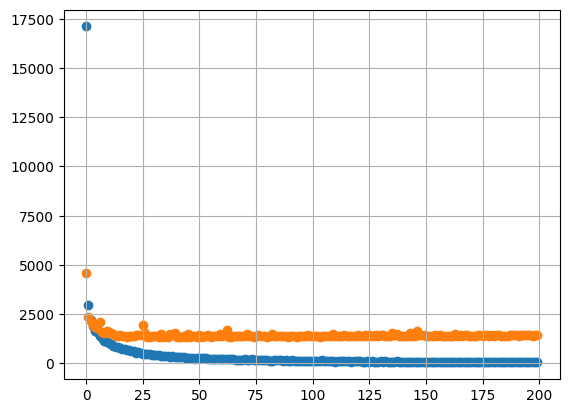

In [26]:
plt.scatter(x=model_fit.epoch, y=model_fit.history['loss'], label='loss')

plt.scatter(x=model_fit.epoch, y=model_fit.history['val_loss'], label='val_loss')

plt.grid(True)

In [27]:
predictions = model.predict(X_test_transformed)



104/104 [==============================] - 0s 2ms/step


In [28]:
X_test['predicted'] = predictions
X_test.head()

,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,day,month,year,day_of_week,predicted
4013,3,3,0,1,3,0.83,11,21.14,22.0028,21,6,2011,1,5.988838
6672,4,14,1,0,1,0.37,0,26.78,26.9990,10,10,2011,0,400.210907
12584,2,13,0,1,2,0.45,26,24.90,26.0024,13,6,2012,2,295.068848
4395,3,1,0,1,1,0.89,13,23.02,22.9994,7,7,2011,3,14.781606
8991,1,12,0,0,1,0.40,20,0.46,-4.9978,15,1,2012,6,204.143127


Consolidated to compare predicted vs actual values visually.

In [29]:
bikes['total'] = bikes['casual'] + bikes['registered'] 

consolidated_results = pd.DataFrame()

consolidated_results['predicted'] = X_test['predicted']

consolidated_results['Index'] = consolidated_results.index.tolist()
consolidated_results.head()

bikes['Index'] = bikes.index.tolist()

merged_df = consolidated_results.merge(bikes[['Index', 'total']], on='Index')

merged_df.head()







,predicted,Index,total
0,5.988838,4013,2
1,400.210907,6672,370
2,295.068848,12584,255
3,14.781606,4395,16
4,204.143127,8991,234


Comparison Charts!

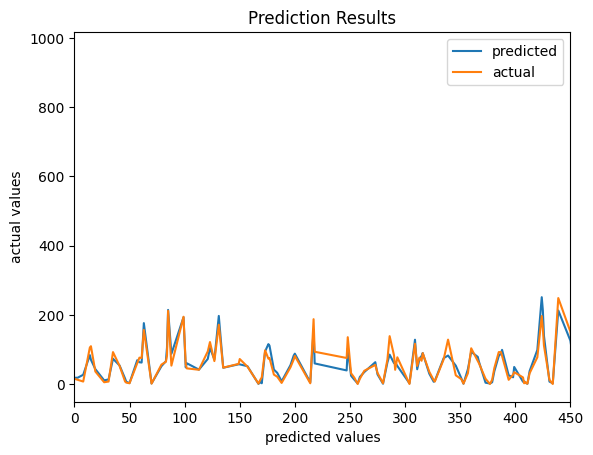

In [30]:
# Create the line plot
sns.lineplot(x='Index', y='predicted', data=merged_df, label='predicted')
sns.lineplot(x='Index', y='total', data=merged_df, label='actual')

# Customize the plot if needed
plt.title('Prediction Results')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.xlim([0,450])
# Display the plot
plt.show()